# Project 2: Comcast Telecom Customer Complaints
### Description
Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone



 Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

Which state has the maximum complaints
Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [40]:
#Assert the versions to be used
import sys
assert sys.version_info >= (3,5) 

import sklearn
assert sklearn.__version__ >= '0.20'

## Import Libraries & Load the Dataset

In [41]:
#usual imports 
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 12

#handle unwanted warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

### Load the dataset


In [42]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv',delimiter=',',parse_dates=True)

In [43]:
#check the first few rows
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [44]:
#check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


Observations
- There are no null or missing values in the dataset.
- There are 11 columns in the dataset
- Except zip code all other features are of type object or string including the Date feature
- As there are string or text feaures, it is important to verify whether there are empty strings which are not getting reflected as null values. 

[]

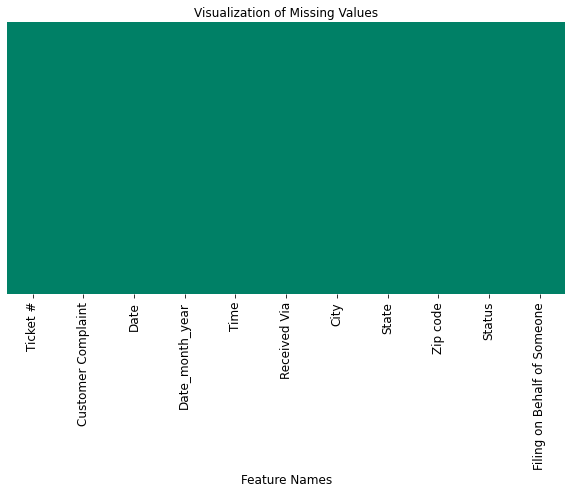

In [45]:
plt.figure(1,figsize=(10,5))
sns.heatmap(df.isnull(),cmap='summer',cbar=False,yticklabels=False)
plt.title('Visualization of Missing Values')
plt.xlabel('Feature Names')
plt.savefig('MissingValues.png',dpi=300)
plt.plot()

As we can see there are no horizaontal color bars which indicate missing values. However, this does not rule out the fact that there could be empty strings (space bars) in one of the text features. 

In [46]:
#check the number of missing values per feature
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [47]:
#create a function to check for empty strings in the columns
def check_empty_string(dataframe=df,column_name='Customer Complaint'):
    empty_string_indices = []
    for i in range(len(df)):
        if dataframe[column_name][i].isspace():
            empty_string_indices.append(i)
        else:
            continue
    print('The len of empty string in the column = {}'.format(len(empty_string_indices)))
    return empty_string_indices    

In [48]:
check_empty_string(df,'Customer Complaint')

The len of empty string in the column = 0


[]

In [49]:
check_empty_string(df,'Received Via')

The len of empty string in the column = 0


[]

As empty string is returned also the len of the indices are 0, there are no empty strings in the Customer Complaint or even in Received Via columns.

### Create a new feature which is length of the customer complaint


In [50]:
df['len_cust_complaint'] = df['Customer Complaint'].apply(len)

In [51]:
#check basic stats of this new column
df['len_cust_complaint'].describe()

count    2224.000000
mean       30.996403
std        19.382296
min         3.000000
25%        17.000000
50%        26.000000
75%        40.000000
max       147.000000
Name: len_cust_complaint, dtype: float64

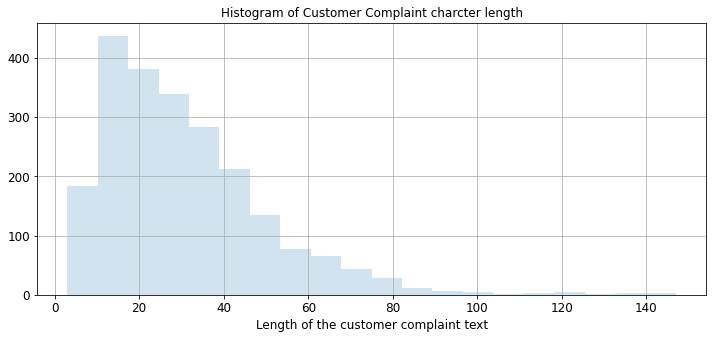

In [52]:
#plot of customer complaint length
plt.figure(1,figsize=(12,5))
plt.hist(df['len_cust_complaint'],bins=20,histtype='stepfilled',alpha=0.2)
plt.title('Histogram of Customer Complaint charcter length')
plt.grid(True)
plt.xlabel('Length of the customer complaint text')
plt.show()

- The complaint text ranges from as low as 3 to 147 characters. 
- Majority of the complaints are 15 to 40 characters.
- The median length is 26 characters and the mean is 30 which are close. 

In [53]:
df['Date_month_year'].unique()

array(['22-Apr-15', '04-Aug-15', '18-Apr-15', '05-Jul-15', '26-May-15',
       '06-Dec-15', '24-Jun-15', '23-Jun-15', '06-Jan-15', '28-Jun-15',
       '24-Apr-15', '05-Jun-15', '13-Jun-15', '30-Jun-15', '27-Jun-15',
       '16-Apr-15', '04-Nov-15', '06-Feb-15', '06-Jul-15', '06-Aug-15',
       '05-Feb-15', '22-Jun-15', '28-Apr-15', '24-May-15', '29-Apr-15',
       '19-May-15', '28-May-15', '06-May-15', '20-Jun-15', '29-Jun-15',
       '21-May-15', '18-Jun-15', '16-Jun-15', '05-Dec-15', '14-Apr-15',
       '15-Apr-15', '13-May-15', '27-May-15', '19-Jun-15', '25-Jun-15',
       '26-Jun-15', '17-Jun-15', '15-May-15', '04-Sep-15', '30-Apr-15',
       '15-Jun-15', '17-Apr-15', '04-Jan-15', '19-Apr-15', '04-Dec-15',
       '23-Apr-15', '05-Jan-15', '05-May-15', '05-Aug-15', '16-May-15',
       '22-May-15', '23-May-15', '25-May-15', '29-May-15', '30-May-15',
       '06-Mar-15', '06-Apr-15', '06-Oct-15', '04-Jul-15', '06-Nov-15',
       '27-Apr-15', '25-Apr-15', '18-May-15', '06-Jun-15', '04-O

### Setting the date and time column in the right format and dtype

In [54]:
#create a datetime string
df['date_time'] = pd.to_datetime(df['Date_month_year'] + ' ' + df['Time'])

In [55]:
df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,len_cust_complaint,date_time
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,29,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,44,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,17,2015-04-18 09:55:47


In [56]:
#Remove the unwanted columns
df.drop(['Date_month_year','Time'],axis=1,inplace=True)

In [57]:
df.head(3)

,Ticket #,Customer Complaint,Date,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,len_cust_complaint,date_time
0,250635,Comcast Cable Internet Speeds,22-04-15,Customer Care Call,Abingdon,Maryland,21009,Closed,No,29,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,Internet,Acworth,Georgia,30102,Closed,No,44,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,Internet,Acworth,Georgia,30101,Closed,Yes,17,2015-04-18 09:55:47


In [58]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Received Via', 'City',
       'State', 'Zip code', 'Status', 'Filing on Behalf of Someone',
       'len_cust_complaint', 'date_time'],
      dtype='object')

In [59]:
df = df[['Ticket #', 'Customer Complaint','Date', 'len_cust_complaint', 'date_time','Received Via', 
         'City', 'State','Zip code','Status', 'Filing on Behalf of Someone']]

In [60]:
df.head(2)

,Ticket #,Customer Complaint,Date,len_cust_complaint,date_time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,29,2015-04-22 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,44,2015-08-04 10:22:56,Internet,Acworth,Georgia,30102,Closed,No


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   len_cust_complaint           2224 non-null   int64         
 4   date_time                    2224 non-null   datetime64[ns]
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
m

In [62]:
#drop the redundant Date column
df.drop('Date',axis=1,inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   len_cust_complaint           2224 non-null   int64         
 3   date_time                    2224 non-null   datetime64[ns]
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 173.9+ KB


### Monthly and Daily Trend of the Customer Complaints


In [64]:
#create a new column for the month
warnings.filterwarnings(action='ignore',message='')
df['month'] = df['date_time'].dt.month

In [65]:
df['year'] = df['date_time'].dt.year

In [66]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'len_cust_complaint', 'date_time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'month', 'year'],
      dtype='object')

In [67]:
#check the number of years represented in the dataset -- > are all issues from same or multiple year
df['year'].value_counts()

2015    2224
Name: year, dtype: int64

All the issues are raised in 2015. In this case the monthly trend would be easier if we group the data monthly.


In [68]:
#create new feature called ticket count
df['ticket_count'] = 1

In [69]:
#create a pivot table and aggregate 
table = pd.pivot_table(df,values='ticket_count',index=['month'],aggfunc=np.sum)

In [70]:
table

,ticket_count
month,
1,55
2,59
3,45
4,375
5,317
6,1046
7,49
8,67
9,55


#### Monthly Trend

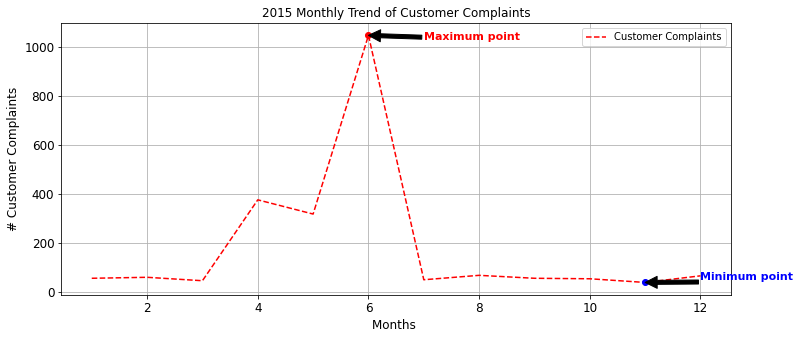

In [71]:
#visualize the monthly aggregated complaints
plt.figure(1,figsize=(12,5))
plt.plot(table,'r--',label='Customer Complaints')
plt.plot(6,1046,'ro')
plt.annotate("Maximum point", xy=(6,1046), xytext=(6+1,1046-20),
                           color="red", weight="heavy", fontsize=11,
                           arrowprops={"facecolor": "black"})
plt.plot(11,38,'bo')
plt.annotate("Minimum point", xy=(11,38), xytext=(11+1,38+10),
                           color="blue", weight="heavy", fontsize=11,
                           arrowprops={"facecolor": "black"})
plt.xlabel('Months ')
plt.ylabel('# Customer Complaints')
plt.title('2015 Monthly Trend of Customer Complaints')
plt.grid(True)
plt.legend()
plt.savefig('LineplotMonthlyTrend.png',dpi=300)
plt.show()

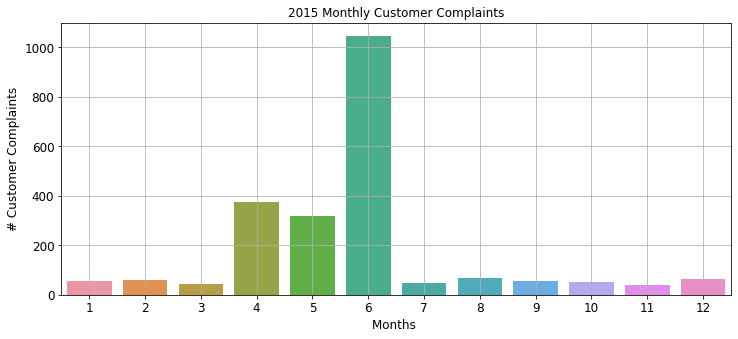

In [72]:
#visualize on a bar plot
plt.figure(figsize=(12,5))
sns.barplot(table.index, table['ticket_count'])
plt.xlabel('Months ')
plt.ylabel('# Customer Complaints')
plt.title('2015 Monthly Customer Complaints')
plt.grid(True)
plt.savefig('BarplotMonthlyTrend.png')
plt.show()

Everything is fine in this plot except for the fact that the x-ticks could be the name of the month rather than the month number.
- The maximum complaints were registered in the month 6 or June 2015. This is a sudden spike compared to all the other months.
- The minimum complaints were registered in the month 11 or November 2015

In [73]:
#create month_name feature 
import calendar
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [74]:
df.columns

Index(['Ticket #', 'Customer Complaint', 'len_cust_complaint', 'date_time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'month', 'year', 'ticket_count',
       'month_name'],
      dtype='object')

In [75]:
#view all the columns of the dataframe
pd.options.display.max_columns = None

In [76]:
df.head(3)

,Ticket #,Customer Complaint,len_cust_complaint,date_time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,year,ticket_count,month_name
0,250635,Comcast Cable Internet Speeds,29,2015-04-22 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,2015,1,Apr
1,223441,Payment disappear - service got disconnected,44,2015-08-04 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,8,2015,1,Aug
2,242732,Speed and Service,17,2015-04-18 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,4,2015,1,Apr


In [77]:
#create a new column with only the date and no time component
import datetime
df['date'] = df['date_time'].apply(datetime.datetime.date)

In [78]:
#check the values of the newly created column
df['date']

0       2015-04-22
1       2015-08-04
2       2015-04-18
3       2015-07-05
4       2015-05-26
           ...    
2219    2015-02-04
2220    2015-02-06
2221    2015-09-06
2222    2015-06-23
2223    2015-06-24
Name: date, Length: 2224, dtype: object

In [79]:
#sort the dataframe based on the date
df.sort_values(by='date',inplace=True)

In [80]:
#create a daily pivot table
table_daily = pd.pivot_table(df,values='ticket_count',index='date',aggfunc='sum')
table_daily

,ticket_count
date,
2015-01-04,18
2015-01-05,12
2015-01-06,25
2015-02-04,27
2015-02-05,7
...,...
2015-11-05,12
2015-11-06,21
2015-12-04,15


#### Daily Trend

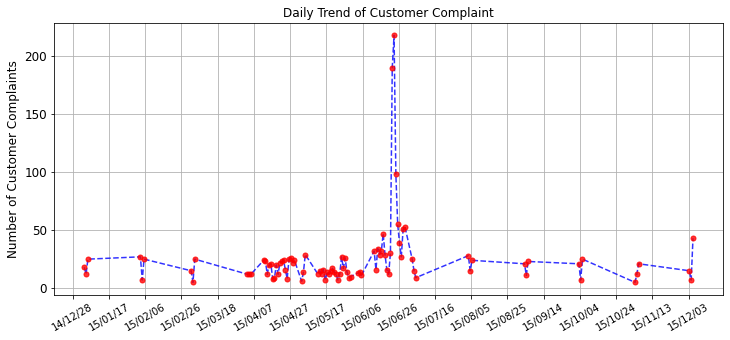

In [81]:
#plot the daily trend of the customer complaint
from matplotlib.dates import (DAILY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
# tick every interval day defined by interval 
rule = rrulewrapper(DAILY,interval=20)
loc = RRuleLocator(rule)

formatter = DateFormatter('%y/%m/%d')
fig,ax = plt.subplots()

plt.plot(table_daily,'b--',marker='o',markerfacecolor='red',label='Customer Complaint',
        mec='red',markersize=5,alpha=0.8)
plt.title('Daily Trend of Customer Complaint')

ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)
ax.xaxis.set_major_locator(loc)

plt.ylabel('Number of Customer Complaints')
plt.grid(True)

plt.savefig('DailyTrendCustomComplaint.png',dpi=300)
plt.show()

- As also in the monthly trend, June had the spike on the number of registered customer complaints.
- Remaining months had the same level of the variation on the number of customer complaints in 2015


## Customer Complaint Frequeny Table

Customer complaint is a text column. Wrangling this column would be necessary to arrive at the various complaint types

In [82]:
#import libraries for text cleaning and processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

#regex and string operation imports
import re
import string

In [83]:
df_complaint = df.copy() #create a copy of the original dataframe

In [84]:
def to_lower(text):
    ''' Convert the string to lower case'''
    ## first split on spaces 
    text_split = text.split()
    word_list = []
    
    for word in text_split:        
        if type(word) == str:
            word_ = word.lower()
            word_list.append(word_)
        new_text = ' '.join(word_list)
    return new_text   

In [85]:
print(df_complaint['Customer Complaint'][10])

Billing after service was asked to be disconnected


In [86]:
#apply the function to_lower defined above
df_complaint['Customer Complaint']= df_complaint['Customer Complaint'].apply(to_lower)

In [87]:
print(df_complaint['Customer Complaint'][10])

billing after service was asked to be disconnected


In [88]:
def split_words(text):
    '''This function splits the sentences into words and filters out the punctuations'''
    tokens = word_tokenize(text)
    # filter out the punctuations
    words = [word for word in tokens if word.isalpha()]
    return words

In [89]:
#apply the function split_words defined above
df_complaint['Customer Complaint']= df_complaint['Customer Complaint'].apply(split_words)

In [90]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/labsuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [91]:
df_complaint['Customer Complaint'].head(10)

1160                                     [comcast, cable]
767     [comcast, is, ignoring, me, now, they, are, ma...
2143                                [fradulent, services]
268                                  [incorrect, billing]
908     [unable, to, get, in, touch, with, anyone, tha...
1537    [comcast, customer, service, theft, inconsiste...
1237                                  [horrible, service]
1536                              [no, internet, service]
1839                                     [data, overages]
2144                      [comcast, refusal, of, service]
Name: Customer Complaint, dtype: object

In [92]:
#filter out the stopwords
def stop_word(text):
    '''This function will filter out the stop words from the word tokens'''
    stop_words = set(stopwords.words('english'))
    words = [word for word in text if not word in stop_words]
    return words

In [93]:
df_complaint['Customer Complaint'] = df_complaint['Customer Complaint'].apply(stop_word)

In [94]:
#view the text after removing the stop words
df_complaint['Customer Complaint'].head(10)

1160                                     [comcast, cable]
767     [comcast, ignoring, making, attempt, correct, ...
2143                                [fradulent, services]
268                                  [incorrect, billing]
908     [unable, get, touch, anyone, power, cancel, se...
1537    [comcast, customer, service, theft, inconsiste...
1237                                  [horrible, service]
1536                                  [internet, service]
1839                                     [data, overages]
2144                          [comcast, refusal, service]
Name: Customer Complaint, dtype: object

In [95]:
def lemma_word(text):
    '''This function performs lemmatization'''
    lemmatizer = WordNetLemmatizer()
    word_lemma = [lemmatizer.lemmatize(word) for word in text]
    return word_lemma

In [96]:
df_complaint['Customer Complaint'] = df_complaint['Customer Complaint'].apply(lemma_word)

In [97]:
#view the text after lemmatization
df_complaint['Customer Complaint'].head(10)

1160                                     [comcast, cable]
767     [comcast, ignoring, making, attempt, correct, ...
2143                                 [fradulent, service]
268                                  [incorrect, billing]
908     [unable, get, touch, anyone, power, cancel, se...
1537    [comcast, customer, service, theft, inconsiste...
1237                                  [horrible, service]
1536                                  [internet, service]
1839                                      [data, overage]
2144                          [comcast, refusal, service]
Name: Customer Complaint, dtype: object

In [98]:
def join_list(text):
    '''This function will perform the join operation'''
    join_text = ' '.join(text)
    return join_text

In [99]:
df_complaint['Customer Complaint'] = df_complaint['Customer Complaint'].apply(join_list)

In [100]:
df_complaint['Customer Complaint'].head(5)

1160                                      comcast cable
767     comcast ignoring making attempt correct problem
2143                                  fradulent service
268                                   incorrect billing
908        unable get touch anyone power cancel service
Name: Customer Complaint, dtype: object

Short write up of all the text processing done so far
- Removed all the punctuations and alpha numeric characters from the strings
- Converted all the text to lower case
- Removed the stop words 
- Lemmatized the list of words and joined them back to form the cleaned text

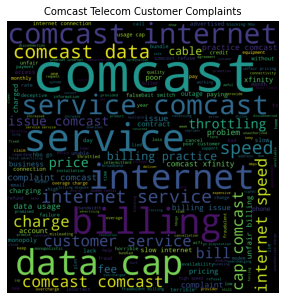

In [101]:
#create word cloud of all the customer complaints
plt.figure(figsize=(12,5))
disaster_wordcloud = WordCloud(background_color='black',width=1500,height=1500).generate(' '.join(df_complaint['Customer Complaint']))
plt.title('Comcast Telecom Customer Complaints',fontsize=10)
plt.axis('off')
plt.imshow(disaster_wordcloud)
plt.show()

In [102]:
#get rid of the word comcast
def comcast_rem(string):
    '''Replace the word comcast with a blank space'''
    return string.replace('comcast',' ')

In [103]:
df_complaint['Customer Complaint'] = df_complaint['Customer Complaint'].apply(comcast_rem)

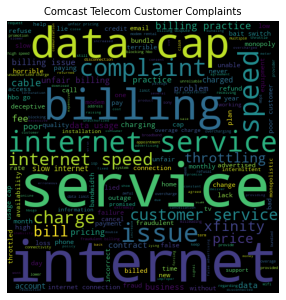

In [104]:
#create word cloud of all the customer complaints
plt.figure(figsize=(12,5))
disaster_wordcloud = WordCloud(background_color='black',width=500,height=500).generate(' '.join(df_complaint['Customer Complaint']))
plt.title('Comcast Telecom Customer Complaints',fontsize=10)
plt.axis('off')
plt.imshow(disaster_wordcloud)
plt.show()

Following are the various complaint categories 
- internet
- speed
- service / customer service
- throttling

We can get a more detailed view based on the CountVectorizer sorted in descending order

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

In [106]:
#using a higher ngram range
vector = CountVectorizer(max_df=0.95,min_df=2,ngram_range=(4,4))

In [107]:
#apply the count vectorizer on complaint column 
vector.fit_transform(df_complaint['Customer Complaint'])

<2224x30 sparse matrix of type '<class 'numpy.int64'>'
	with 62 stored elements in Compressed Sparse Row format>

In [108]:
#list down the vocabulary
vector.vocabulary_

{'modem returned year ago': 20,
 'exaggerated bill lack responsibility': 11,
 'bill lack responsibility keep': 0,
 'lack responsibility keep appointment': 18,
 'responsibility keep appointment disrespect': 24,
 'keep appointment disrespect consumer': 17,
 'data cap atlanta ga': 9,
 'blocking hbo go access': 1,
 'customer service error lie': 7,
 'service error lie wasted': 25,
 'error lie wasted time': 10,
 'customer service billing complaint': 6,
 'unwilling resolve data usage': 28,
 'resolve data usage issue': 23,
 'blocking hbo go playstation': 2,
 'internet help south lyon': 14,
 'help south lyon mi': 13,
 'internet low income family': 15,
 'continued slowness almost week': 5,
 'blocking hbo go sony': 3,
 'false advertising bait switch': 12,
 'violating open internet rule': 29,
 'charged data actually used': 4,
 'paying high speed internet': 21,
 'customer service terrible internet': 8,
 'internet throttling unfair billing': 16,
 'throttling unfair billing practice': 27,
 'paying hi

In [109]:
#create a sorted list in descending order of frequency of the complaint
sorted_complaints = {k: v for k, v in sorted(vector.vocabulary_.items(), key=lambda item: item[1],reverse = True)}

In [110]:
sorted_complaints

{'violating open internet rule': 29,
 'unwilling resolve data usage': 28,
 'throttling unfair billing practice': 27,
 'service service call complaint': 26,
 'service error lie wasted': 25,
 'responsibility keep appointment disrespect': 24,
 'resolve data usage issue': 23,
 'paying high speed service': 22,
 'paying high speed internet': 21,
 'modem returned year ago': 20,
 'lack service service call': 19,
 'lack responsibility keep appointment': 18,
 'keep appointment disrespect consumer': 17,
 'internet throttling unfair billing': 16,
 'internet low income family': 15,
 'internet help south lyon': 14,
 'help south lyon mi': 13,
 'false advertising bait switch': 12,
 'exaggerated bill lack responsibility': 11,
 'error lie wasted time': 10,
 'data cap atlanta ga': 9,
 'customer service terrible internet': 8,
 'customer service error lie': 7,
 'customer service billing complaint': 6,
 'continued slowness almost week': 5,
 'charged data actually used': 4,
 'blocking hbo go sony': 3,
 'bloc

In [111]:
len(vector.vocabulary_)

30

In [112]:
type(sorted_complaints)

dict

### Table of the top complaints

In [113]:
pd.DataFrame.from_dict(sorted_complaints,orient='index',columns=['Frequency'])

,Frequency
violating open internet rule,29
unwilling resolve data usage,28
throttling unfair billing practice,27
service service call complaint,26
service error lie wasted,25
responsibility keep appointment disrespect,24
resolve data usage issue,23
paying high speed service,22
paying high speed internet,21
modem returned year ago,20


### Summary 1: Top Customer Complaints
- Internet: issue related to data usage, slowness, incorrect throttling
- Customer service: unresponsive, failing to keep appointment
- Billing: Exaggerated bills, incorrect data usage, unfair billing

    

In [114]:
df.head(3)

,Ticket #,Customer Complaint,len_cust_complaint,date_time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,year,ticket_count,month_name,date
1160,211472,comcast cable,13,2015-01-04 10:43:20,Customer Care Call,Lockport,Illinois,60441,Closed,No,1,2015,1,Jan,2015-01-04
767,213355,Comcast is ignoring me now. They are making NO...,74,2015-01-04 22:56:15,Internet,Golden,Colorado,80401,Closed,No,1,2015,1,Jan,2015-01-04
2143,213198,Fradulent Services,18,2015-01-04 20:56:38,Customer Care Call,Waukegan,Illinois,60085,Closed,No,1,2015,1,Jan,2015-01-04


In [115]:
df['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [116]:
def new_state(status):
    '''This function marks Open & Pending as Open, Solved,Closed as Closed'''
    if status == 'Open' or status == 'Pending':
        return 'Open'
    else:
        return 'Closed'

In [117]:
#create a new categorical feature based on the status of the ticket
df['Status_new'] = df['Status'].apply(new_state)

In [118]:
#check the number of occurrences of the modified status
df['Status_new'].value_counts()

Closed    1707
Open       517
Name: Status_new, dtype: int64

In [119]:
#check the number of unique states in the dataset
len(df['State'].unique())

43

In [120]:
#group by State and then by the status of the tickets
state_status = df.groupby(['State','Status_new']).size().unstack().fillna(0)

In [121]:
#view the new grouped dataframe
state_status[:10]

Status_new,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


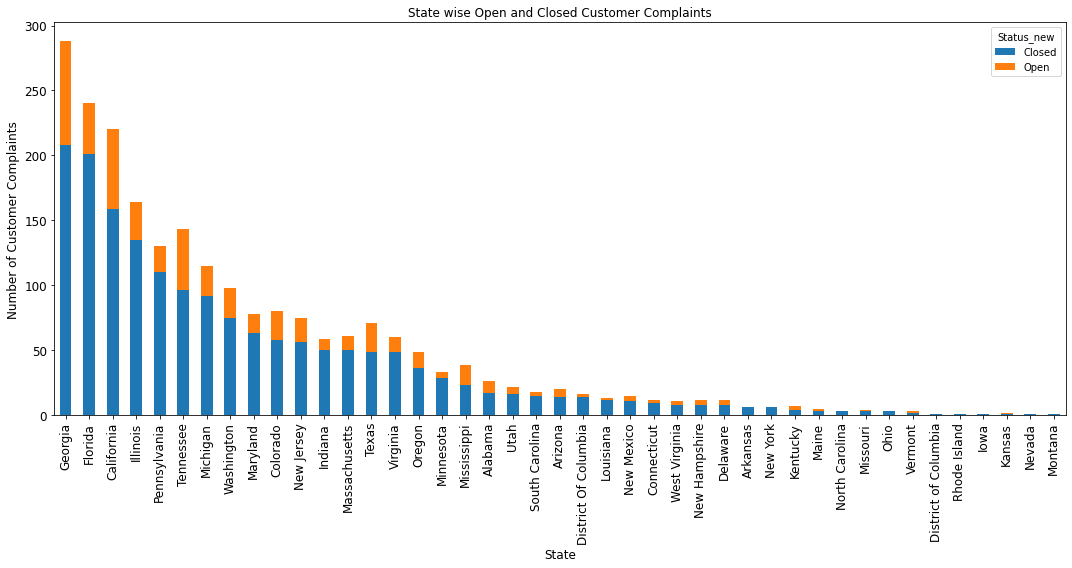

In [122]:
#plot the stacked bar plot -- > using pandas plotting
state_status.sort_values('Closed',axis=0,ascending=False).plot(kind='bar',figsize=(15,8),stacked=True)
plt.title('State wise Open and Closed Customer Complaints')
plt.ylabel('Number of Customer Complaints')
plt.tight_layout()
plt.savefig('StatewiseOpenClosed.png',dpi=300)
plt.show()

#### Observation from stacked bar chart: Georgia state had the maximum number of complaints
The top five states with the maximum customer complaints are 
- Georgia
- Florida
- California
- Illinois
- Tennesse


In [123]:
#sort the grouped dataframe into descending order of total open tickets
state_status.sort_values('Open',ascending=False).head(5)

Status_new,Closed,Open
State,,
Georgia,208.0,80.0
California,159.0,61.0
Tennessee,96.0,47.0
Florida,201.0,39.0
Illinois,135.0,29.0


In [124]:
#calculate the %unresolve customer complaint
state_status['%unresolved'] = (state_status['Open'] / state_status['Open'].sum())*100

In [125]:
#sort in the descending order of the %unresolved
state_status.sort_values('%unresolved',ascending=False).head(3)

Status_new,Closed,Open,%unresolved
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909


#### Georgia which has the highest percentage of unresolved customer complaints

### Summary 2: 
- State with highest customer complaints: Georgia
- State with highest percentage of unresolved customer complaints: Georgia

 Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [126]:
complaint_origin = df.groupby(['Received Via','Status_new']).size().unstack().fillna(0)

In [127]:
complaint_origin

Status_new,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [128]:
complaint_origin['%resolved'] = round(complaint_origin['Closed']/(complaint_origin['Closed']+complaint_origin['Open'])*100,2)

In [129]:
complaint_origin

Status_new,Closed,Open,%resolved
Received Via,,,
Customer Care Call,864,255,77.21
Internet,843,262,76.29


In [130]:
complaint_origin['total'] = complaint_origin['Closed']+complaint_origin['Open']

In [131]:
complaint_origin

Status_new,Closed,Open,%resolved,total
Received Via,,,,
Customer Care Call,864,255,77.21,1119
Internet,843,262,76.29,1105


In [132]:
closed_via_custcare = round(complaint_origin.loc['Customer Care Call']['Closed']/complaint_origin['Closed'].sum()*100,2)

In [133]:
closed_via_custcare

50.62

In [134]:
closed_via_internet = round(complaint_origin.loc['Internet']['Closed']/complaint_origin['Closed'].sum()*100,2)

In [135]:
closed_via_internet

49.38

### Summary 3:
- 77.21% of all the complaints received via customer care are resolved. 
- 76.295 of all the complaints received via internet are resolved.
- Out of all the closed complaints, 50.62% is contributed by those received via customer care
- Out of all the closed complaints, 49.38% is contributed by those received via internet